Бутылка Клейна — неориентируемая (односторонняя) поверхность, описана в 1881 году немецким математиком Феликсом Клейном. Тесно связана с лентой Мёбиуса и проективной плоскостью.

Параметризация в общем виде:
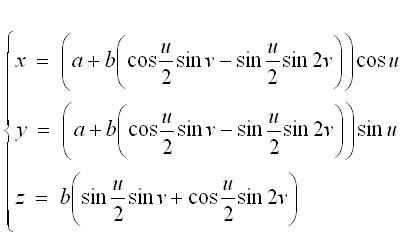

Варианты бутылки:

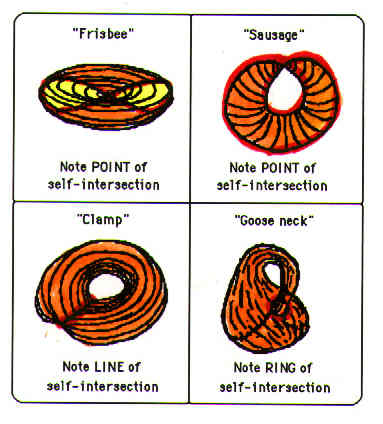

параметризация, используемая в коде:

$$
\begin{align*}
\text{half} &= (0 \leq u) \& (u < \pi) \\
r &= 4 \cdot \left(1 - \frac{\cos(u)}{2}\right) \\
x &= 6 \cdot \cos(u) \cdot (1 + \sin(u)) + r \cdot \cos(v + \pi) \\
x[\text{half}] &= \left(6 \cdot \cos(u) \cdot (1 + \sin(u)) + r \cdot \cos(u) \cdot \cos(v)\right)[\text{half}] \\
y &= 16 \cdot \sin(u) \\
y[\text{half}] &= \left(16 \cdot \sin(u) + r \cdot \sin(u) \cdot \cos(v)\right)[\text{half}] \\
z &= r \cdot \sin(v)
\end{align*} 
$$

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from ipywidgets import interact, FloatSlider

In [2]:
%matplotlib widget

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

def surf(u, v):
    half = (0 <= u) & (u < np.pi)
    r = 4 * (1 - np.cos(u) / 2)
    x = 6 * np.cos(u) * (1 + np.sin(u)) + r * np.cos(v + np.pi)
    x[half] = ((6 * np.cos(u) * (1 + np.sin(u)) + r * np.cos(u) * np.cos(v))[half])
    y = 16 * np.sin(u)
    y[half] = (16 * np.sin(u) + r * np.sin(u) * np.cos(v))[half]
    z = r * np.sin(v)
    return x, y, z

class Draggable3DPlot:
    def __init__(self, ax):
        self.ax = ax
        self.press = None
        self.ax.figure.canvas.mpl_connect('button_press_event', self.on_press)
        self.ax.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)
        self.ax.figure.canvas.mpl_connect('button_release_event', self.on_release)

    def on_press(self, event):
        if event.inaxes != self.ax:
            return
        self.press = event.xdata, event.ydata

    def on_motion(self, event):
        if self.press is None:
            return
        if event.inaxes != self.ax:
            return
        xprev, yprev = self.press
        dx = event.xdata - xprev
        dy = event.ydata - yprev
        self.press = event.xdata, event.ydata
        azim, elev = self.ax.azim, self.ax.elev
        self.ax.view_init(elev+dy*0.5, azim-dx*0.5) 
        self.ax.figure.canvas.draw()

    def on_release(self, event):
        self.press = None
        self.ax.figure.canvas.draw()

def plot_klein_bottle(opacity=1.0):
    clear_output(wait=True)
    
    u, v = np.linspace(0, 2 * np.pi, 40), np.linspace(0, 2 * np.pi, 40)
    ux, vx = np.meshgrid(u, v)
    x, y, z = surf(ux, vx)
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=False, alpha=opacity)
    ax.set_title('Бутылка Клейна')

    
    draggable = Draggable3DPlot(ax)
    plt.show()

opacity_slider = widgets.FloatSlider(value=1.0, min=0.0, max=1.0, step=0.1, description='Прозрачность:', style={'description_width': 'initial'})
widgets.interactive(plot_klein_bottle, opacity=opacity_slider)

interactive(children=(FloatSlider(value=1.0, description='Прозрачность:', max=1.0, style=SliderStyle(descripti…